/var/folders/79/lmgzzcl17bb5gc349jpl0mvm0000gn/T/ipykernel_83961/962170002.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/79/lmgzzcl17bb5gc349jpl0mvm0000gn/T/ipykernel_83961/962170002.py:78: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
/var/folders/79/lmgzzcl17bb5gc349jpl0mvm0000gn/T/ipykernel_83961/962170002.py:97: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(
/var/folders/79/lmgzzcl17bb5gc349jpl0mvm0000gn/T/ipykernel_83961/962170002.py:97: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, et

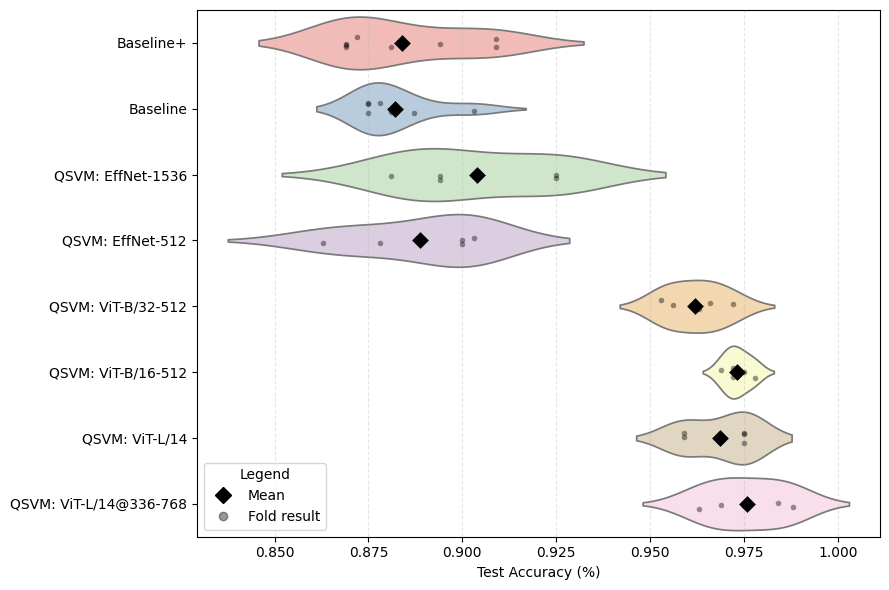

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

os.makedirs("./images", exist_ok=True)
# save_filename = "FMNIST_violinplot_test_accuracy"
# metric_type = "Test Acc (%)"

# baseline_imgs = "../EXPERIMENTS/baseline_fmnist/qubits_16_CV/16_qubits_quantum_eval_metrics.csv"
# baseline_imgs_opt = "../EXPERIMENTS/baseline_fmnist_opt/qubits_16_CV/16_qubits_quantum_eval_metrics.csv"
# enet_ve_512 = "../EXPERIMENTS/efficientnet_512_fmnist/qubits_16_CV/16_qubits_quantum_eval_metrics.csv"
# enet_ve_1536 = "../EXPERIMENTS/efficientnet_1536_fmnist/qubits_16_CV/16_qubits_quantum_eval_metrics.csv"
# vit_b_16_512 = "../EXPERIMENTS/vit-b_16_512_fmnist/qubits_16_CV/16_qubits_quantum_eval_metrics.csv"
# vit_b_32_512 = "../EXPERIMENTS/vit-b_32_512_fmnist/qubits_16_CV/16_qubits_quantum_eval_metrics.csv"
# vit_l_14_768 = "../EXPERIMENTS/vit-l_14_768_fmnist/qubits_16_CV/16_qubits_quantum_eval_metrics.csv"
# vit_l_14_at_336 = "../EXPERIMENTS/vit-l_14_at_336px_768_fmnist/qubits_16_CV/16_qubits_quantum_eval_metrics.csv"


save_filename = "MNIST_violinplot_test_accuracy"
metric_type = "Test Acc (%)"

baseline_imgs = "../EXPERIMENTS/baseline_mnist/qubits_16_CV/16_qubits_quantum_eval_metrics.csv"
baseline_imgs_opt = "../EXPERIMENTS/baseline_mnist_opt/qubits_16_CV/16_qubits_quantum_eval_metrics.csv"
enet_ve_512 = "../EXPERIMENTS/efficientnet_512_mnist/qubits_16_CV/16_qubits_quantum_eval_metrics.csv"
enet_ve_1536 = "../EXPERIMENTS/efficientnet_1536_mnist/qubits_16_CV/16_qubits_quantum_eval_metrics.csv"
vit_b_16_512 = "../EXPERIMENTS/vit-b_16_512_mnist/qubits_16_CV/16_qubits_quantum_eval_metrics.csv"
vit_b_32_512 = "../EXPERIMENTS/vit-b_32_512_mnist/qubits_16_CV/16_qubits_quantum_eval_metrics.csv"
vit_l_14_768 = "../EXPERIMENTS/vit-l_14_768_mnist/qubits_16_CV/16_qubits_quantum_eval_metrics.csv"
vit_l_14_at_336 = "../EXPERIMENTS/vit-l_14_at_336px_768_mnist/qubits_16_CV/16_qubits_quantum_eval_metrics.csv"


baseline_imgs_df = pd.read_csv(baseline_imgs)
baseline_imgs_opt_df = pd.read_csv(baseline_imgs_opt)
enet_ve_512_df = pd.read_csv(enet_ve_512)
enet_ve_1536_df = pd.read_csv(enet_ve_1536)
vit_b_16_512_df = pd.read_csv(vit_b_16_512)
vit_b_32_512_df = pd.read_csv(vit_b_32_512)
vit_l_14_768_df = pd.read_csv(vit_l_14_768)
vit_l_14_at_336_df = pd.read_csv(vit_l_14_at_336)

# Assign model names
baseline_imgs_df["Model"] = "Baseline"
baseline_imgs_opt_df["Model"] = "Baseline+"
enet_ve_512_df["Model"] = "QSVM: EffNet-512"
enet_ve_1536_df["Model"] = "QSVM: EffNet-1536"
vit_b_16_512_df["Model"] = "QSVM: ViT-B/16-512"
vit_b_32_512_df["Model"] = "QSVM: ViT-B/32-512"  # Adjust if you want "Ours: ViT-B/32-512" etc.
vit_l_14_768_df["Model"] = "QSVM: ViT-L/14"
vit_l_14_at_336_df["Model"] = "QSVM: ViT-L/14@336-768"



plot_df = pd.concat(
    [
        baseline_imgs_df,
        baseline_imgs_opt_df,
        enet_ve_512_df,
        enet_ve_1536_df,
        vit_b_16_512_df,
        vit_b_32_512_df,
        vit_l_14_768_df,
        vit_l_14_at_336_df
    ],
    ignore_index=True
)

ordered_models = (
    plot_df.groupby("Model")[metric_type]
    .median()
    .sort_values(ascending=True)
    .index.tolist()
)

plt.figure(figsize=(9, 6))
sns.violinplot(
    data=plot_df,
    y="Model",
    x=metric_type,
    order=ordered_models,
    palette="Pastel1",
    inner=None,
    scale="width"
)
sns.stripplot(
    data=plot_df,
    y="Model",
    x=metric_type,
    order=ordered_models,
    color="k",
    alpha=0.4,
    jitter=0.1,
    size=4
)
sns.pointplot(
    data=plot_df,
    y="Model",
    x=metric_type,
    order=ordered_models,
    join=False,
    estimator="mean",
    ci=None,
    color="black",
    markers="D",
    scale=1.2,
    errwidth=0
)

custom_legend = [
    Line2D([0], [0], marker="D", color="black", label="Mean", markersize=8, linestyle=""),
    Line2D([0], [0], marker="o", color="k", label="Fold result", linestyle="", alpha=0.4)
]

plt.legend(handles=custom_legend, title="Legend", loc="lower left")
plt.xlabel("Test Accuracy (%)")
plt.ylabel("")
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.savefig(f"./images/{save_filename}.svg", bbox_inches="tight")
plt.savefig(f"./images/{save_filename}.png", dpi=300, bbox_inches="tight")
plt.show()